# **Clustering -  ExploraSura**

Los pasos para hacer un ejercicio de clustering son: (la preparación de los datos se debe hacer por aparte, excepto la ingeneiría de características y el balanceo cuando aplique)
 
1. Preparación de datos: variables numéricas se deben normalizar y variables categórcias se crean dummies
2. Aprendizaje del Modelo: Kmeans, método del codo/rodilla
3. Evaluación del Modelo: Inertia, silueta (no existe una función en python para la separabilidad, tocaría aplicar la fórmula)
4. Perfilamiento: Descripción de centroides

### **1. Preparación de datos**

* Previa limpieza de atípicos, nulos y altas correlaciones

In [1]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [2]:
# Se cargan los datos
df = pd.read_csv("D:/Especializacion/Mineria de datos/Proyecto_Sura/Datos_preparados_ExploraSura.csv") #Cargar datos en excel
df.head() #muestras los 5 primeros registros

,Conteo_Autorizaciones,Sexo,Edad,Nivel_Estudios,Regional,Regimen,Nivel_Ingresos,Estado_Civil,Ind_Masa_Corporal,Ind_Ejercicio
0,2,M,43,'SIN NIVEL EDUCATIVO','REGIONAL CENTRO',SUBSIDIADO,'NIVEL 2 DEL SISBEN','UNION LIBRE',SOBREPESO,ND
1,1,F,24,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND
2,1,M,77,'SIN NIVEL EDUCATIVO','REGIONAL EJE CAFETERO',CONTRIBUTIVO,'COTIZANTES CON INGRESOS ENTRE 2 Y 5 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND
3,1,F,56,TECNICA,'REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE',OBESIDAD,ND
4,1,M,40,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SOLTERO (A)',SOBREPESO,ND


In [3]:
df.info() 
#Las variables tipo object se deben convertir a categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402968 entries, 0 to 402967
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Conteo_Autorizaciones  402968 non-null  int64 
 1   Sexo                   402968 non-null  object
 2   Edad                   402968 non-null  int64 
 3   Nivel_Estudios         402968 non-null  object
 4   Regional               402968 non-null  object
 5   Regimen                402968 non-null  object
 6   Nivel_Ingresos         402968 non-null  object
 7   Estado_Civil           402968 non-null  object
 8   Ind_Masa_Corporal      402968 non-null  object
 9   Ind_Ejercicio          402968 non-null  object
dtypes: int64(2), object(8)
memory usage: 30.7+ MB


In [3]:
#Corregir tipos de datos
df['Sexo']=df['Sexo'].astype('category')
df['Nivel_Estudios']=df['Nivel_Estudios'].astype('category')
df['Regional']=df['Regional'].astype('category')
df['Regimen']=df['Regimen'].astype('category')
df['Nivel_Ingresos']=df['Nivel_Ingresos'].astype('category')
df['Estado_Civil']=df['Estado_Civil'].astype('category')
df['Ind_Masa_Corporal']=df['Ind_Masa_Corporal'].astype('category')
df['Ind_Ejercicio']=df['Ind_Ejercicio'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402968 entries, 0 to 402967
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Conteo_Autorizaciones  402968 non-null  int64   
 1   Sexo                   402968 non-null  category
 2   Edad                   402968 non-null  int64   
 3   Nivel_Estudios         402968 non-null  category
 4   Regional               402968 non-null  category
 5   Regimen                402968 non-null  category
 6   Nivel_Ingresos         402968 non-null  category
 7   Estado_Civil           402968 non-null  category
 8   Ind_Masa_Corporal      402968 non-null  category
 9   Ind_Ejercicio          402968 non-null  category
dtypes: category(8), int64(2)
memory usage: 9.2 MB


In [6]:
df.describe()

,Conteo_Autorizaciones,Edad
count,402968.000000,402968.000000
mean,1.505383,48.439601
std,1.016998,23.140362
min,1.000000,0.000000
25%,1.000000,31.000000
50%,1.000000,51.000000
75%,2.000000,66.000000
max,29.000000,111.000000


array([[<Axes: title={'center': 'Conteo_Autorizaciones'}>,
        <Axes: title={'center': 'Edad'}>]], dtype=object)

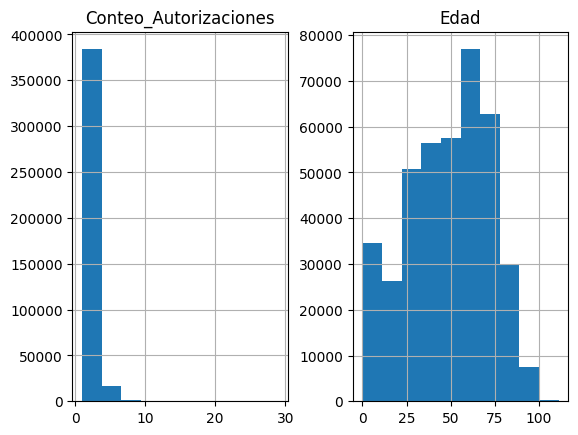

In [7]:
# Histogramas de las variables numéricas
df.hist()

<Axes: >

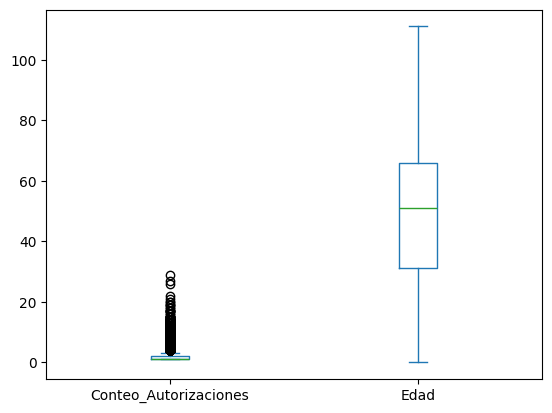

In [8]:
# Gráfico box para variables numéricas
df.plot(kind='box')

El círculo que parece ser un dato atípico NO se debe eliminar dado que es un dato real

<Axes: xlabel='Sexo'>

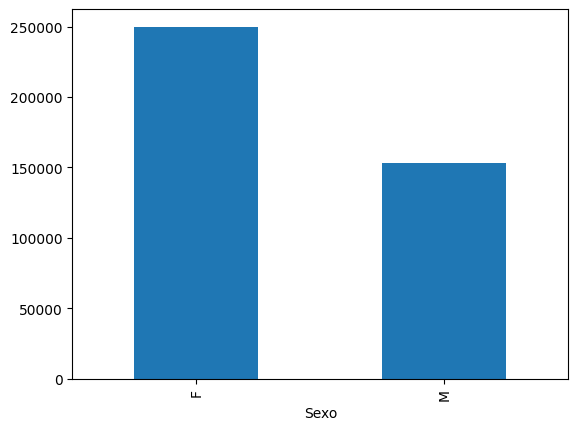

In [9]:
#Conocemos las variables categóricas: value_counts()
df['Sexo'].value_counts().plot(kind='bar')

<Axes: xlabel='Nivel_Estudios'>

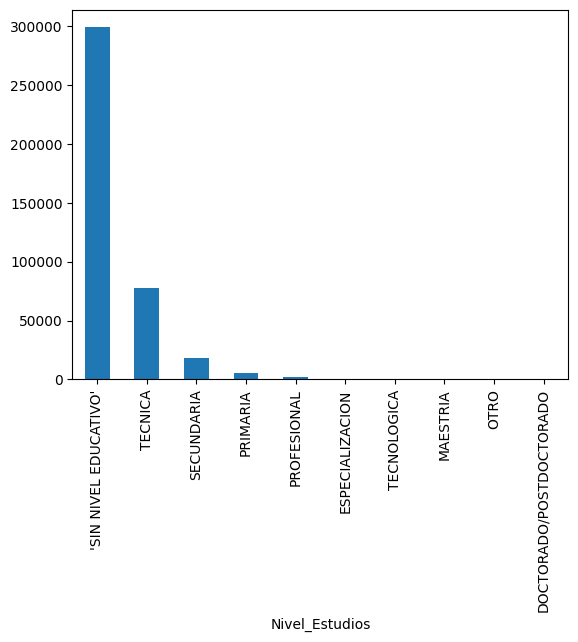

In [10]:
df['Nivel_Estudios'].value_counts().plot(kind='bar')

<Axes: xlabel='Regional'>

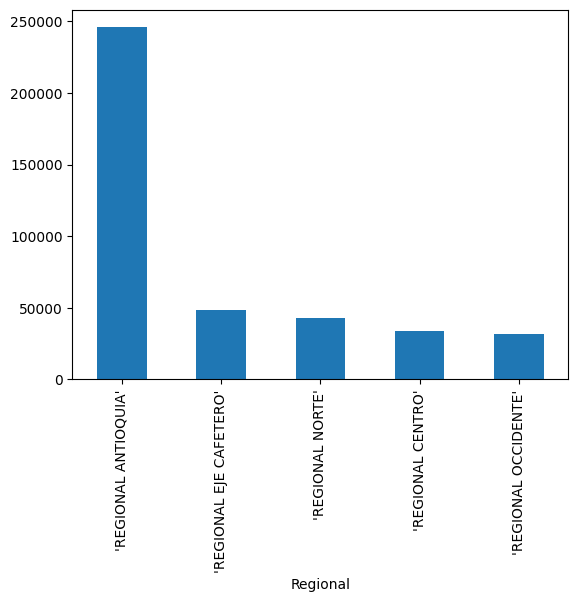

In [11]:
df['Regional'].value_counts().plot(kind='bar')

<Axes: xlabel='Regimen'>

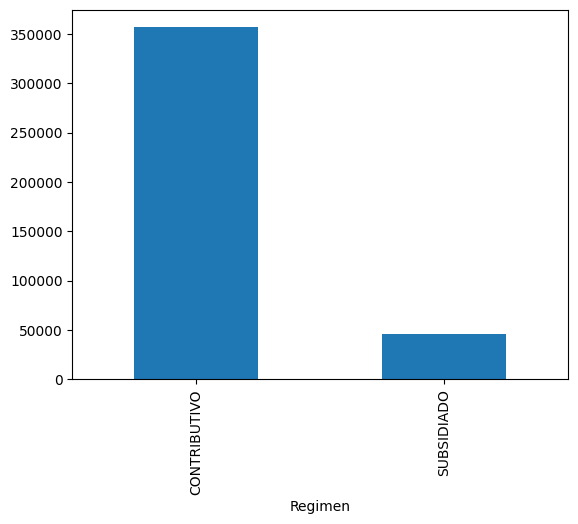

In [12]:
df['Regimen'].value_counts().plot(kind='bar')

<Axes: xlabel='Nivel_Ingresos'>

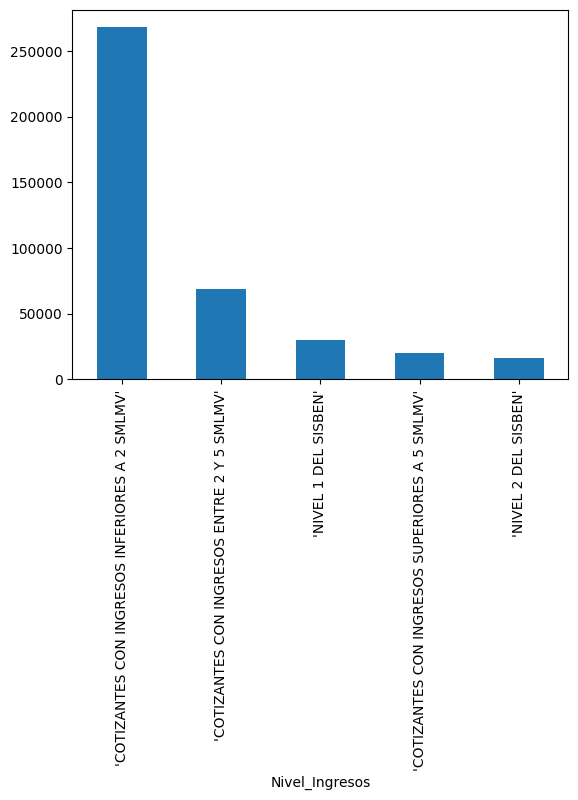

In [13]:
df['Nivel_Ingresos'].value_counts().plot(kind='bar')

<Axes: xlabel='Estado_Civil'>

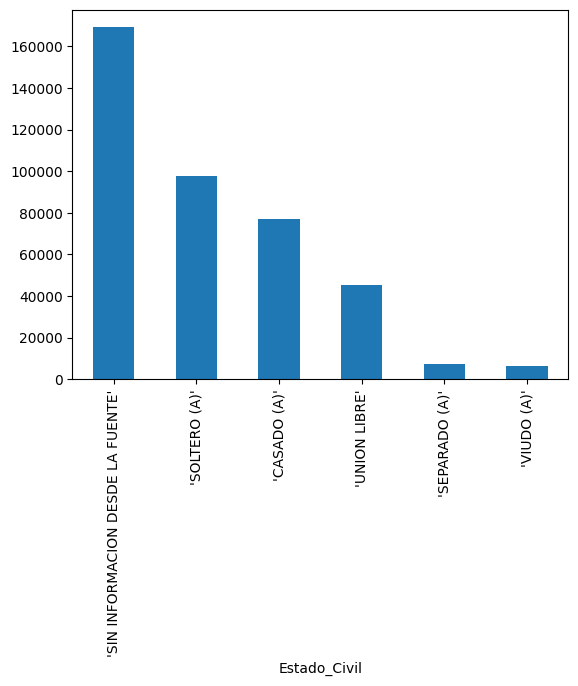

In [14]:
df['Estado_Civil'].value_counts().plot(kind='bar')

<Axes: xlabel='Ind_Masa_Corporal'>

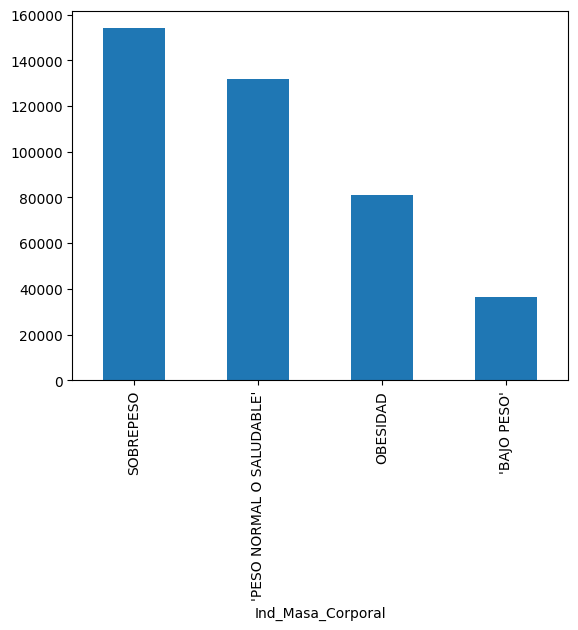

In [15]:
df['Ind_Masa_Corporal'].value_counts().plot(kind='bar')

<Axes: xlabel='Ind_Ejercicio'>

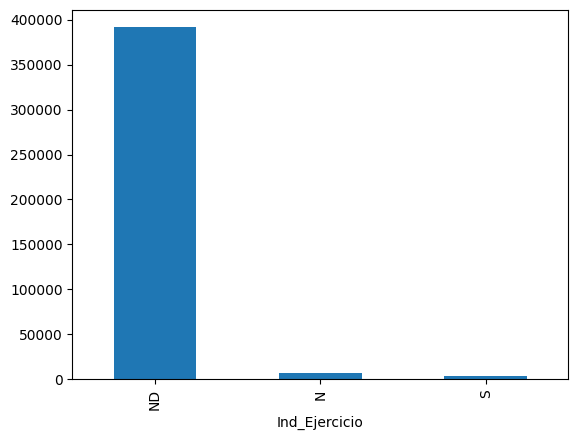

In [16]:
df['Ind_Ejercicio'].value_counts().plot(kind='bar')

#### **NO se hace balanceo porque no hay variable objetivo**

In [4]:
# Transformaciones: normalizar y crear dummies

# Copia de los datos
data = df.copy()

In [5]:
from sklearn.preprocessing import MinMaxScaler #SKlearn es la librería para ML

In [6]:
#Normalizacion de variables numéricas

min_max_scaler = MinMaxScaler() # El método MinMaxScales es el que realiza la normalización
variables_a_normalizar=['Conteo_Autorizaciones', 'Edad']
min_max_scaler.fit(data[variables_a_normalizar]) #Ajuste de parámetro 
#(el método fit es el encargado de hacer el aprendizaje/entrenamiento)
data[variables_a_normalizar]= min_max_scaler.transform(data[variables_a_normalizar]) 
# el método transform aplica el método de normalización
data.head()

,Conteo_Autorizaciones,Sexo,Edad,Nivel_Estudios,Regional,Regimen,Nivel_Ingresos,Estado_Civil,Ind_Masa_Corporal,Ind_Ejercicio
0,0.035714,M,0.387387,'SIN NIVEL EDUCATIVO','REGIONAL CENTRO',SUBSIDIADO,'NIVEL 2 DEL SISBEN','UNION LIBRE',SOBREPESO,ND
1,0.000000,F,0.216216,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND
2,0.000000,M,0.693694,'SIN NIVEL EDUCATIVO','REGIONAL EJE CAFETERO',CONTRIBUTIVO,'COTIZANTES CON INGRESOS ENTRE 2 Y 5 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND
3,0.000000,F,0.504505,TECNICA,'REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE',OBESIDAD,ND
4,0.000000,M,0.360360,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SOLTERO (A)',SOBREPESO,ND


<Axes: >

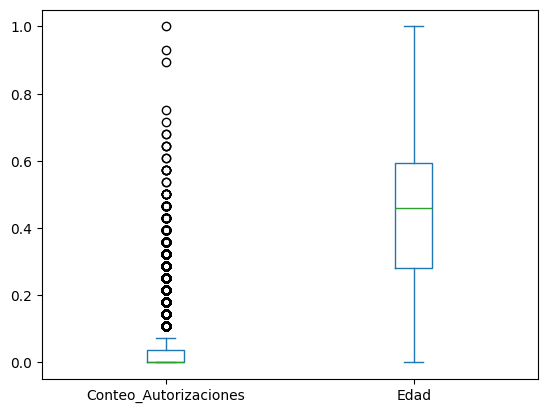

In [20]:
data.plot(kind='box')

In [7]:
# Se crean dummies para las variables categóricas
data = pd.get_dummies(data, columns=['Sexo','Regimen'], drop_first=True, dtype=int)

data = pd.get_dummies(data, columns=['Nivel_Estudios','Regional','Nivel_Ingresos',
                                     'Estado_Civil','Ind_Masa_Corporal',
                                     'Ind_Ejercicio'], drop_first=False,  dtype=int) #No borra dummy

data.head()

,Conteo_Autorizaciones,Edad,Sexo_M,Regimen_SUBSIDIADO,Nivel_Estudios_'SIN NIVEL EDUCATIVO',Nivel_Estudios_DOCTORADO/POSTDOCTORADO,Nivel_Estudios_ESPECIALIZACION,Nivel_Estudios_MAESTRIA,Nivel_Estudios_OTRO,Nivel_Estudios_PRIMARIA,...,Estado_Civil_'SOLTERO (A)',Estado_Civil_'UNION LIBRE',Estado_Civil_'VIUDO (A)',Ind_Masa_Corporal_'BAJO PESO',Ind_Masa_Corporal_'PESO NORMAL O SALUDABLE',Ind_Masa_Corporal_OBESIDAD,Ind_Masa_Corporal_SOBREPESO,Ind_Ejercicio_N,Ind_Ejercicio_ND,Ind_Ejercicio_S
0,0.035714,0.387387,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0.000000,0.216216,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.000000,0.693694,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.000000,0.504505,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.000000,0.360360,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


#### **2. Aprendizaje del modelo**

* Método del codo/rodilla
* Aplicar Kmeans

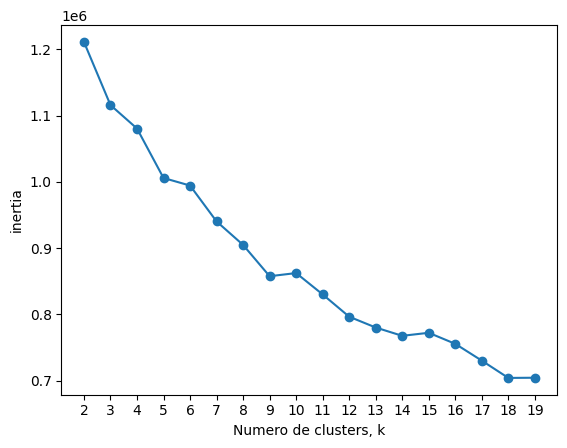

In [8]:
#Método del codo para encontrar la mejor cantidad de clusters: inertia
from sklearn.cluster import KMeans
 
ks = range(2, 20) # crear valores del 2 al 20
inertias = []
 
for k in ks:
    # Crear  modelo
    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(data)
    inertias.append(model.inertia_)
 
# Graficar cantidad de clusters vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
#Creación de modelo de clustering con Kmeans
from sklearn.cluster import KMeans
k=9
model = KMeans(n_clusters=k, max_iter=300)
model.fit(data) # datos
 

,n_clusters,9
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


### **3. Evaluación del modelo**

* Inercia: valor pequeño esperado
* Silueta: valor positivo esperado, idealmente mayor a 0.5

In [10]:
#Evaluación
from sklearn import metrics
 
#Inertia: se require valor pequeño
print('Inercia o cohesión:', model.inertia_)

Inercia o cohesión: 882798.0835693564


In [27]:
#Silueta: se requiere que sea positivo, ideal 0.5-1.0
sil=metrics.silhouette_score(data, model.labels_)
print('Silueta:',sil)

Silueta: 0.12855862685979166


In [24]:
data.shape

(402968, 37)

### **4. Perfilamiento**

Descripción de centroides

In [15]:
#Centroides de los cluster se convierten  en un dataframe de pandas
centroides=pd.DataFrame(model.cluster_centers_, columns=data.columns.values)
centroides.round(1)

,Conteo_Autorizaciones,Edad,Sexo_M,Regimen_SUBSIDIADO,Nivel_Estudios_'SIN NIVEL EDUCATIVO',Nivel_Estudios_DOCTORADO/POSTDOCTORADO,Nivel_Estudios_ESPECIALIZACION,Nivel_Estudios_MAESTRIA,Nivel_Estudios_OTRO,Nivel_Estudios_PRIMARIA,...,Estado_Civil_'SOLTERO (A)',Estado_Civil_'UNION LIBRE',Estado_Civil_'VIUDO (A)',Ind_Masa_Corporal_'BAJO PESO',Ind_Masa_Corporal_'PESO NORMAL O SALUDABLE',Ind_Masa_Corporal_OBESIDAD,Ind_Masa_Corporal_SOBREPESO,Ind_Ejercicio_N,Ind_Ejercicio_ND,Ind_Ejercicio_S
0,0.0,0.5,0.4,0.2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.4,0.4,0.1,0.9,0.0,0.0,0.0,0.0,0.0,...,0.2,0.1,0.0,-0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.4,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.1,0.0,0.0,0.8,0.2,-0.0,0.0,1.0,0.0
3,0.0,0.5,0.3,0.1,0.9,0.0,0.0,0.0,0.0,0.0,...,0.2,0.1,0.0,-0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.5,0.4,0.1,0.9,0.0,0.0,0.0,0.0,0.0,...,0.4,0.2,0.0,-0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.1,0.5,0.0,0.8,-0.0,0.0,-0.0,0.0,0.0,...,0.1,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,1.0,0.0
6,0.0,0.1,0.5,0.2,0.9,-0.0,0.0,0.0,0.0,0.0,...,0.1,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,1.0,0.0
7,0.0,0.5,0.4,0.1,0.0,0.0,0.0,0.0,-0.0,0.0,...,0.3,0.2,0.0,0.0,0.0,0.3,0.7,0.0,1.0,0.0
8,0.0,0.4,0.4,0.1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.1,0.0,0.0,1.0,-0.0,-0.0,0.0,1.0,0.0


In [16]:
# Se realiza una des-normalización centroides
centroides[variables_a_normalizar]=min_max_scaler.inverse_transform(centroides[variables_a_normalizar])
centroides = centroides.round(0)
centroides

,Conteo_Autorizaciones,Edad,Sexo_M,Regimen_SUBSIDIADO,Nivel_Estudios_'SIN NIVEL EDUCATIVO',Nivel_Estudios_DOCTORADO/POSTDOCTORADO,Nivel_Estudios_ESPECIALIZACION,Nivel_Estudios_MAESTRIA,Nivel_Estudios_OTRO,Nivel_Estudios_PRIMARIA,...,Estado_Civil_'SOLTERO (A)',Estado_Civil_'UNION LIBRE',Estado_Civil_'VIUDO (A)',Ind_Masa_Corporal_'BAJO PESO',Ind_Masa_Corporal_'PESO NORMAL O SALUDABLE',Ind_Masa_Corporal_OBESIDAD,Ind_Masa_Corporal_SOBREPESO,Ind_Ejercicio_N,Ind_Ejercicio_ND,Ind_Ejercicio_S
0,2.0,53.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,48.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,1.0,0.0
3,1.0,53.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,55.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,2.0,13.0,1.0,0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,1.0,0.0
6,1.0,13.0,1.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,1.0,0.0
7,1.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,2.0,49.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,0.0,1.0,0.0


#### **Descripción de perfiles**

*Perfil 0*: Salario de al rededor de 5.948.148, no hijos, incapacidades de 3 días al año, 8 años de antigüedad, no casados, con carro, sin casa propia, mujeres que hacen parte del sindicato.

In [ ]:
Sexo                   402968 non-null  category
 2   Edad                   402968 non-null  int64   
 3   Nivel_Estudios         402968 non-null  category
 4   Regional               402968 non-null  category
 5   Regimen                402968 non-null  category
 6   Nivel_Ingresos         402968 non-null  category
 7   Estado_Civil           402968 non-null  category
 8   Ind_Masa_Corporal     
 9   Ind_Ejercicio   

In [27]:
 df['Ind_Ejercicio'].value_counts()

Ind_Ejercicio
ND    391203
N       7706
S       4059
Name: count, dtype: int64

<Axes: ylabel='count'>

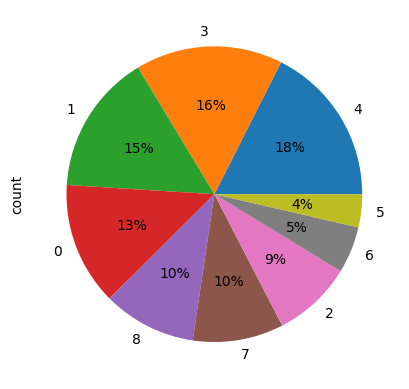

In [17]:
#En el dataframe original, se adiciona el cluster asignado a cada registro
df['cluster']=model.labels_
df.head()
 
#Cantidad de datos en cada cluster
df["cluster"].value_counts().plot(kind='pie',autopct='%.0f%%')

In [18]:
df.head()

,Conteo_Autorizaciones,Sexo,Edad,Nivel_Estudios,Regional,Regimen,Nivel_Ingresos,Estado_Civil,Ind_Masa_Corporal,Ind_Ejercicio,cluster
0,2,M,43,'SIN NIVEL EDUCATIVO','REGIONAL CENTRO',SUBSIDIADO,'NIVEL 2 DEL SISBEN','UNION LIBRE',SOBREPESO,ND,4
1,1,F,24,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND,1
2,1,M,77,'SIN NIVEL EDUCATIVO','REGIONAL EJE CAFETERO',CONTRIBUTIVO,'COTIZANTES CON INGRESOS ENTRE 2 Y 5 SMLMV','SIN INFORMACION DESDE LA FUENTE','PESO NORMAL O SALUDABLE',ND,8
3,1,F,56,TECNICA,'REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SIN INFORMACION DESDE LA FUENTE',OBESIDAD,ND,7
4,1,M,40,'SIN NIVEL EDUCATIVO','REGIONAL ANTIOQUIA',CONTRIBUTIVO,'COTIZANTES CON INGRESOS INFERIORES A 2 SMLMV','SOLTERO (A)',SOBREPESO,ND,4


In [19]:
#Almacenar resultados
df.to_csv('./resultados_Kmeans_ExploraSura.csv', sep=';',index=False)
centroides.to_excel('./centroides.xlsx')